# Random Graphs
## Rejection Method
Here, we will show that this method is exponential for sparse graphs

In [3]:
import numpy as np

In [8]:
def rejection_method_dnp(n,p,seed =None):
    rng=np.random.RandomState(seed)
    G=[[] for k in range(n)]
    while min(map(len,G)) == 0:
        G=[[] for k in range(n)]
        for k in range(n):
            degree=rng.binomial(n,p)
            G[k]=rng.choice(n,degree)
    return G

In [73]:
import datetime
import time
import pandas as pd
def generate_rejection_timestamps(N,p=None,c=None,seed=None,simulations=1):
    seeder=np.random.RandomState(seed)
    T=[]
    for n in N:
        for k in range(simulations):
            if c is not None:
                p=min(c/n,1)
            t0=time.time()
            rejection_method_dnp(n,p,seed=seeder.randint(2**32))
            t1=time.time()
            T.append(t1-t0)
    return np.repeat(N,simulations),T
A,B=generate_rejection_timestamps(np.arange(1,100,5),c=3,seed=39,simulations=20)

KeyboardInterrupt: 

In [74]:
C= [5]
dataset=[]
for c in C:
    A,B=generate_rejection_timestamps(np.arange(1,100,5),c=c,seed=39,simulations=20)
    for a,b in zip(A,B):
        dataset.append({"size":a,"time":b,"C":c})
dataset=pd.DataFrame(dataset)

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_rejection_dnp_results(N,T):
    fig,axs=plt.subplots(1,2,figsize=(15,5))
    sns.lineplot(x=N,y=T,ax=axs[0])
    sns.lineplot(x=N,y=np.log(T),ax=axs[1])
    return fig,axs

(<Figure size 1500x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

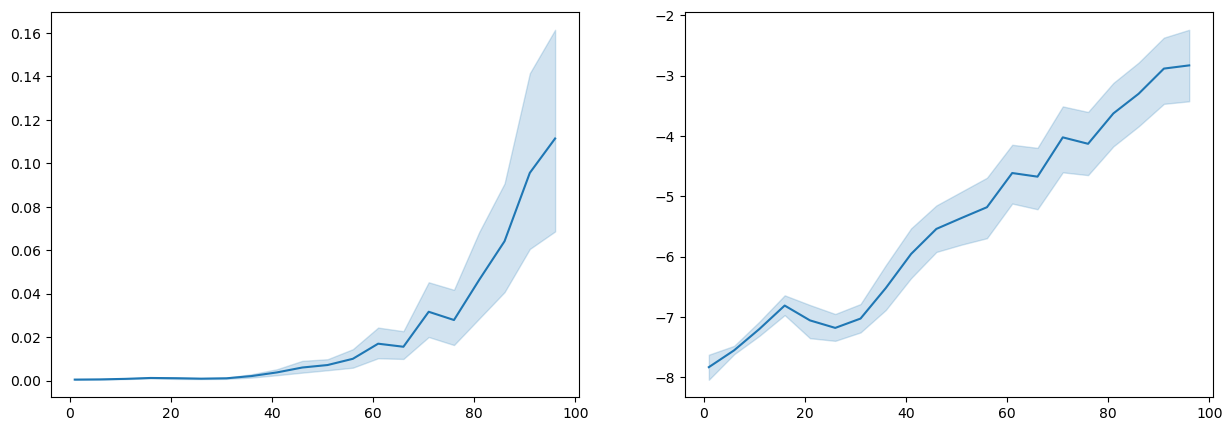

In [72]:
plot_rejection_dnp_results(A,B)

## Binomial Rejection
Here, we will show that this method is efficient

In [115]:
def generate_dnp(n,p,seed=None):
    return random_graph.gnp_random_graph_sinkless(n=n,p=p,seed=seed)

def generate_binomial_rejection_timestamps(N,p=None,c=None,seed=None,simulations=1):
    seeder=np.random.RandomState(seed)
    T=[]
    E=[]
    for n in N:
        for k in range(simulations):
            if c is not None:
                p=min(c/n,1)
            t0=time.time()
            G=generate_dnp(n,p,seed=seeder.randint(2**32))
            t1=time.time()
            E.append(len(G.edges))
            T.append(t1-t0)
    return np.repeat(N,simulations),T,E

In [116]:
C= [1,5,10]
dataset=[]
for c in C:
    A,B,E=generate_binomial_rejection_timestamps(np.arange(1,100,5),c=c,seed=39,simulations=20)
    for a,b,e in zip(A,B,E):
        dataset.append({"size":a,"time":b,"C":c,"edges":e})
dataset=pd.DataFrame(dataset)

<Axes: xlabel='size', ylabel='time'>

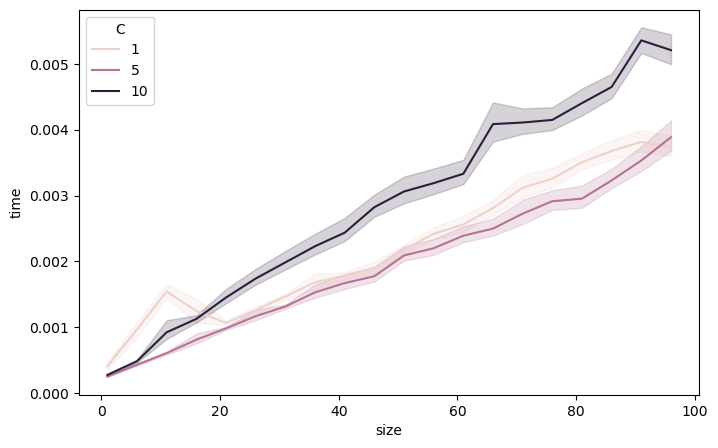

In [105]:
fig,ax=plt.subplots(1,1,figsize=(8,5))
sns.lineplot(data=dataset,x="size",y="time",hue="C",ax=ax)


In [119]:
dataset[["size","edges","C"]].groupby(["size","C"]).mean()

edges
size C         
1    1     1.00
     5     1.00
     10    1.00
6    1     9.00
     5    29.45
     10   36.00
11   1    17.00
     5    53.45
     10  110.00
16   1    24.70
     5    82.50
     10  161.45
21   1    32.30
     5   106.80
     10  213.00
26   1    40.10
     5   130.70
     10  258.45
31   1    48.10
     5   155.25
     10  315.45
36   1    55.30
     5   182.30
     10  359.75
41   1    65.25
     5   210.65
     10  410.75
46   1    74.45
     5   230.25
     10  456.50
51   1    79.05
     5   252.70
     10  502.85
56   1    88.50
     5   277.60
     10  558.35
61   1    97.35
     5   305.00
     10  610.05
66   1   102.55
     5   332.95
     10  656.00
71   1   111.25
     5   359.05
     10  713.80
76   1   122.25
     5   379.70
     10  760.75
81   1   128.40
     5   402.30
     10  803.80
86   1   136.30
     5   430.65
     10  864.50
91   1   142.45
     5   465.65
     10  909.60
96   1   149.90
     5   487.05
     10  946.60

In [91]:
P= [0.1,0.5,1]
dataset=[]
for p in P:
    A,B=generate_binomial_rejection_timestamps(np.arange(1,100,5),p=p,seed=39,simulations=20)
    for a,b in zip(A,B):
        dataset.append({"size":a,"time":b,"P":p})
dataset=pd.DataFrame(dataset)

ValueError: Could not interpret value `P` for parameter `hue`

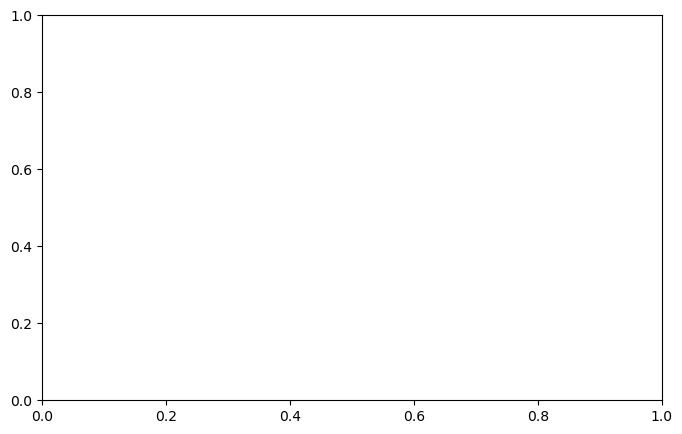

In [104]:
fig,ax=plt.subplots(1,1,figsize=(8,5))
sns.lineplot(data=dataset,x="size",y="time",hue="P",ax=ax)


8